<a href="https://colab.research.google.com/github/PreethamThinagaraj/Projects/blob/main/ML/Classification_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading the data
p2_data=pd.read_csv("E:/ML Project/CE802_P2_Data/CE802_P2_Data.csv")

In [ ]:
p2_data.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.20,-4.91,-41.64,-21.63,8.41,2,5.42,-84.01,-9.40,76.72,-0.42,36,0.33,30.60,NaN,False
1,3.98,-5.25,-47.64,-23.43,8.66,2,4.32,-83.01,-11.16,2.72,0.50,111,0.84,39.42,9.26,True
2,12.60,0.41,-50.64,-15.51,16.34,20,-4.00,25.99,-15.08,450.72,-3.60,525,5.10,21.78,NaN,False
3,14.70,1.09,-50.64,-4.74,15.09,20,-8.16,10.99,-13.12,190.72,-5.71,660,7.25,15.78,6.57,False
4,2.74,-3.86,-35.64,-23.91,8.67,2,2.80,-53.01,-19.22,24.72,0.59,33,0.85,25.08,NaN,True


In [ ]:
p2_data.shape

(1500, 16)

In [ ]:
p2_data.dtypes

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6         int64
F7       float64
F8       float64
F9       float64
F10      float64
F11      float64
F12        int64
F13      float64
F14      float64
F15      float64
Class       bool
dtype: object

In [ ]:
#checking for null values
p2_data.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

In [ ]:
#mappling true and false to 1 and 0
p2_data["Class"] = p2_data["Class"].map({False: 0, True: 1})

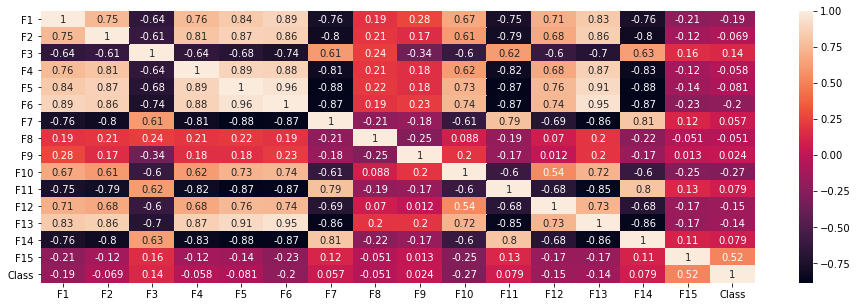

In [ ]:
#correlation heat map
fig, ax = plt.subplots(figsize=(16,5))
sns.heatmap(p2_data.corr(), annot=True,ax=ax)
plt.show()

In [ ]:
# fill missing values with mean column values
p2_data.fillna(p2_data.mean(), inplace=True)

In [ ]:
#dropped columns as part of feature selection
X = p2_data.drop(["Class","F11","F14"],axis=1)
#storing the target variable in Y
Y = p2_data.Class

In [ ]:
X

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F12,F13,F15
0,3.20,-4.91,-41.64,-21.63,8.41,2,5.42,-84.01,-9.40,76.72,36,0.33,7.683013
1,3.98,-5.25,-47.64,-23.43,8.66,2,4.32,-83.01,-11.16,2.72,111,0.84,9.260000
2,12.60,0.41,-50.64,-15.51,16.34,20,-4.00,25.99,-15.08,450.72,525,5.10,7.683013
3,14.70,1.09,-50.64,-4.74,15.09,20,-8.16,10.99,-13.12,190.72,660,7.25,6.570000
4,2.74,-3.86,-35.64,-23.91,8.67,2,2.80,-53.01,-19.22,24.72,33,0.85,7.683013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,15.60,-2.92,-110.64,-5.94,15.84,20,-4.20,-104.01,-7.90,90.72,720,6.10,7.683013
1496,0.64,-6.48,-41.64,-21.69,8.74,2,2.74,-65.01,-10.58,70.72,18,0.57,7.700000
1497,12.00,-1.38,-80.64,-13.14,13.49,20,-1.48,-54.01,-9.00,240.72,270,6.50,7.683013
1498,18.20,-2.87,-50.64,-5.31,13.34,20,-4.18,-19.01,-8.30,380.72,150,10.15,6.450000


In [ ]:
Y

0       0
1       1
2       0
3       0
4       1
       ..
1495    1
1496    0
1497    0
1498    0
1499    0
Name: Class, Length: 1500, dtype: int64

# Data normilization for models which perform better with normilized data

In [ ]:
#creating a list of headers
col_names = list(X.columns)

In [ ]:
col_names

['F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'F6',
 'F7',
 'F8',
 'F9',
 'F10',
 'F12',
 'F13',
 'F15']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(X)

In [ ]:
data

array([[0.10191083, 0.49598247, 0.88461538, ..., 0.03076923, 0.03188406,
        0.53602625],
       [0.12675159, 0.47114682, 0.80769231, ..., 0.09487179, 0.08115942,
        0.84645669],
       [0.40127389, 0.88458729, 0.76923077, ..., 0.44871795, 0.49275362,
        0.53602625],
       ...,
       [0.38216561, 0.75383492, 0.38461538, ..., 0.23076923, 0.62801932,
        0.53602625],
       [0.57961783, 0.64499635, 0.76923077, ..., 0.12820513, 0.98067633,
        0.29330709],
       [0.50636943, 0.85244704, 0.76923077, ..., 0.30769231, 0.76328502,
        0.53602625]])

In [ ]:
#converting the array into a dataframe
dataset = pd.DataFrame(data,columns=col_names)

In [ ]:
dataset

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F12,F13,F15
0,0.101911,0.495982,0.884615,0.442339,0.061084,0.1,0.611756,0.441860,0.774242,0.195918,0.030769,0.031884,0.536026
1,0.126752,0.471147,0.807692,0.392916,0.085714,0.1,0.569219,0.446512,0.640909,0.044898,0.094872,0.081159,0.846457
2,0.401274,0.884587,0.769231,0.610379,0.842365,1.0,0.247486,0.953488,0.343939,0.959184,0.448718,0.492754,0.536026
3,0.468153,0.934259,0.769231,0.906096,0.719212,1.0,0.086620,0.883721,0.492424,0.428571,0.564103,0.700483,0.316929
4,0.087261,0.572681,0.961538,0.379736,0.086700,0.1,0.510441,0.586047,0.030303,0.089796,0.028205,0.082126,0.536026
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.496815,0.641344,0.000000,0.873147,0.793103,1.0,0.239753,0.348837,0.887879,0.224490,0.615385,0.589372,0.536026
1496,0.020382,0.381300,0.884615,0.440692,0.093596,0.1,0.508121,0.530233,0.684848,0.183673,0.015385,0.055072,0.539370
1497,0.382166,0.753835,0.384615,0.675453,0.561576,1.0,0.344934,0.581395,0.804545,0.530612,0.230769,0.628019,0.536026
1498,0.579618,0.644996,0.769231,0.890445,0.546798,1.0,0.240526,0.744186,0.857576,0.816327,0.128205,0.980676,0.293307


In [ ]:
#data splitting for models which perform better with normalised data for training the model
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(dataset,Y,test_size=0.3)

In [ ]:
#creating a empty list to store the accuracy score
score=[]
#creating the list of model names for plotting
Model_name=['Descision Tree','RandomForest','SVC','KNN Classifier','Logistic Regression','XGBoost Classifier']

# Descision tree classifier

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
#split the data into training and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X , Y, cv=10)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.82666667 0.82666667 0.76       0.75333333 0.81333333 0.77333333
 0.72666667 0.83333333 0.77333333 0.84666667]


In [ ]:
#making predictions using cross validation to validate model
predictions = cross_val_predict(clf, X, Y, cv=10)
accuracy = metrics.accuracy_score(Y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.7953333333333333


In [ ]:
scores = pd.Series(scores)
scores.mean()

0.7933333333333332

In [ ]:
#fitting the model
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
#making predictions
y_pred=clf.predict(x_test)

In [ ]:
#Generaing accuracy score to check the performance of the model
metrics.accuracy_score(y_test, y_pred)

0.7822222222222223

In [ ]:
# defining parameter range
param_grid = {
'criterion' : ['gini', 'entropy'],
'max_depth': [2,4,6,8,10,12,14,16,18,20],
'min_samples_split': [2,3, 4, 5],
'min_impurity_decrease': [0.01 , 0.012,0.004 , 0.008],
'min_samples_leaf':[2,5,6,8,10] 
}

In [ ]:
#grid search for tuning the parameters
from sklearn.model_selection import GridSearchCV
CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid,scoring='accuracy', cv= 5)
CV_dt.fit(x_train, y_train)
CV_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_impurity_decrease': 0.004,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [ ]:
#tuned decision tree classifier
clf_t = DecisionTreeClassifier(criterion='entropy', max_depth=20,min_impurity_decrease= 0.004,min_samples_leaf= 2,min_samples_split= 5)

In [ ]:
clf_t.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20,
                       min_impurity_decrease=0.004, min_samples_leaf=2,
                       min_samples_split=5)

In [ ]:
y_pred=clf_t.predict(x_test)

In [ ]:
dt=metrics.accuracy_score(y_test, y_pred)
print("accuracy_score:\n",dt)
score.append(dt)

accuracy_score:
 0.8177777777777778


In [ ]:
print('Precision score=',metrics.precision_score(y_test, y_pred))
print('Recall score=',metrics.recall_score(y_test, y_pred))

Precision score= 0.8221153846153846
Recall score= 0.7916666666666666


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create Decision Tree classifer object
rf = RandomForestClassifier()
scores = cross_val_score(rf, X , Y, cv=10)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.87333333 0.9        0.86666667 0.86666667 0.85333333 0.88666667
 0.86       0.86       0.87333333 0.88      ]


In [ ]:
#making predictions using cross validation to validate model
predictions = cross_val_predict(rf, X, Y, cv=10)
accuracy = metrics.accuracy_score(Y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.8753333333333333


In [ ]:
scores = pd.Series(scores)
scores.mean()

0.8720000000000001

In [ ]:
#fitting the model
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#making predictions
y_pred=rf.predict(x_test)

In [ ]:
#Generaing accuracy score to check the performance of the model
metrics.accuracy_score(y_test, y_pred)

0.8933333333333333

In [ ]:
#from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 700, num = 50)] # randomly generating 50 numbers from 100 to 700
max_features = ['auto']  # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]   # Maximum number of levels in tree
max_depth.append(None)
#rf = RandomForestClassifier(random_state=42)

In [ ]:
# defining parameter range
param_grid = { 
    'n_estimators': n_estimators,
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : max_depth,
    'criterion' :['gini', 'entropy']
}

In [ ]:
#grid search for tuning the parameters
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid,scoring='accuracy', cv= 5, n_jobs=10)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 112, 124, 136, 148, 161, 173,
                                          185, 197, 210, 222, 234, 246, 259,
                                          271, 283, 295, 308, 320, 332, 344,
                                          357, 369, 381, 393, 406, 418, 430,
                                          442, 455, ...]},
             scoring='accuracy')

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 100}

In [ ]:
#tuned random forest model with best parameters
rf_t = RandomForestClassifier(n_estimators= 553,
    max_features= 'auto',
    max_depth = 20,
    criterion='entropy')

In [ ]:
rf_t.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=553)

In [ ]:
y_pred=rf_t.predict(x_test)

In [ ]:
randomforest=metrics.accuracy_score(y_test, y_pred)
print("accuracy_score:\n",randomforest)
score.append(randomforest)

accuracy_score:
 0.9044444444444445


In [ ]:
print('Precision score=',metrics.precision_score(y_test, y_pred))
print('Recall score=',metrics.recall_score(y_test, y_pred))

Precision score= 0.9023255813953488
Recall score= 0.8981481481481481


# SVM

In [ ]:
# "Support Vector Classifier" 
from sklearn.svm import SVC   
claf = SVC(kernel='linear')  
  
# fitting x samples and y classes  
scores = cross_val_score(claf, X , Y, cv=10)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.90666667 0.88       0.88       0.89333333 0.87333333 0.88
 0.80666667 0.88       0.86666667 0.86      ]


In [ ]:
#making predictions using cross validation to validate model
predictions = cross_val_predict(claf, X, Y, cv=10)
accuracy = metrics.accuracy_score(Y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.8726666666666667


In [ ]:
scores = pd.Series(scores)
scores.mean()

0.8726666666666665

In [ ]:
#fitting the model
claf.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
#making predictions
y_pred=claf.predict(x_test)

In [ ]:
#Generaing accuracy score to check the performance of the model
metrics.accuracy_score(y_test, y_pred)

0.8866666666666667

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']} 

In [ ]:
#grid search for tuning the parameters
grid = GridSearchCV(SVC(), param_grid,refit = True, verbose = 3)

In [ ]:
# fitting the model for grid search 
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.848, total=   1.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.857, total=   1.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.857, total=   0.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.905, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.867, total=   1.9s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.848, total=   1.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.857, total=   1.8s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.857, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.905, total=   1.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.838, total= 2.0min
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.857, total= 1.9min
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.871, total=  57.4s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.905, total= 1.0min
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.881, total= 7.0min
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.838, total= 4.6min
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.857, total= 4.0min
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .

[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.857, total= 4.4min
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.838, total= 4.2min
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.848, total= 4.0min
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.867, total= 5.9min
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.867, total= 7.4min
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.857, total= 4.4min
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.838, total= 4.1min


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 431.4min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVC(C=10, gamma=1, kernel='linear')


In [ ]:
#tuned SVC model with best parameters
claf_t = SVC(kernel='linear',C=10, gamma=1) 
claf_t.fit(x_train, y_train)
y_pred=claf_t.predict(x_test)
svc=metrics.accuracy_score(y_test, y_pred)
print("accuracy_score:\n",svc)
score.append(svc)

accuracy_score:
 0.8777777777777778


In [ ]:
print('Precision score=',metrics.precision_score(y_test, y_pred))
print('Recall score=',metrics.recall_score(y_test, y_pred))

Precision score= 0.8888888888888888
Recall score= 0.8518518518518519


# KNN Classifier

In [ ]:
#KNN performs better when the data is normalised 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# fitting x samples and y classes  
scores = cross_val_score(classifier, dataset , Y, cv=10)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.78       0.76       0.75333333 0.78       0.78       0.81333333
 0.79333333 0.75333333 0.81333333 0.78      ]


In [ ]:
#making predictions using cross validation to validate model
predictions = cross_val_predict(classifier, dataset, Y, cv=10)
accuracy = metrics.accuracy_score(Y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.7806666666666666


In [ ]:
scores = pd.Series(scores)
scores.mean()

0.7806666666666666

In [ ]:
#fitting the model and making prediction 
classifier.fit(x1_train, y1_train)
y_pred=classifier.predict(x1_test)
knn=metrics.accuracy_score(y1_test, y_pred)
print("accuracy_score:\n",knn)
score.append(knn)

accuracy_score:
 0.8044444444444444


In [ ]:
print('Precision score=',metrics.precision_score(y1_test, y_pred))
print('Recall score=',metrics.recall_score(y1_test, y_pred))

Precision score= 0.8685714285714285
Recall score= 0.7004608294930875


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
scores = cross_val_score(model, dataset , Y, cv=10)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.84       0.81333333 0.81333333 0.83333333 0.83333333 0.79333333
 0.72666667 0.83333333 0.78       0.8       ]


In [ ]:
predictions = cross_val_predict(model, dataset, Y, cv=10)
accuracy = metrics.accuracy_score(Y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.8066666666666666


In [ ]:
scores = pd.Series(scores)
scores.mean()

0.8066666666666666

In [ ]:
#fitting the model and making prediction 
model.fit(x1_train, y1_train)
y_pred=model.predict(x1_test)
logreg=metrics.accuracy_score(y1_test, y_pred)
print("accuracy_score:\n",logreg)
score.append(logreg)

accuracy_score:
 0.7977777777777778


In [ ]:
print('Precision score=',metrics.precision_score(y1_test, y_pred))
print('Recall score=',metrics.recall_score(y1_test, y_pred))

Precision score= 0.8118811881188119
Recall score= 0.7557603686635944


# XGBOOST Classifier

In [ ]:
import xgboost as xgb
modelxgb=xgb.XGBClassifier(random_state=1,learning_rate=0.01,use_label_encoder=False)

In [ ]:
# fitting x samples and y classes  
scores = cross_val_score(modelxgb, X , Y, cv=10)
print ('Cross-validated scores:', scores)

[20:35:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
predictions = cross_val_predict(modelxgb, X, Y, cv=10)
accuracy = metrics.accuracy_score(Y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

[20:35:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
scores = pd.Series(scores)
scores.mean()

0.8153333333333332

In [ ]:
#fitting the model and making prediction 
modelxgb.fit(x_train, y_train)
y_pred=modelxgb.predict(x_test)
xg=metrics.accuracy_score(y_test, y_pred)
print("accuracy_score:\n",xg)
score.append(xg)

[20:35:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score:
 0.8644444444444445


In [ ]:
print('Precision score=',metrics.precision_score(y_test, y_pred))
print('Recall score=',metrics.recall_score(y_test, y_pred))

Precision score= 0.863849765258216
Recall score= 0.8518518518518519


# confusion matrix plot for each model

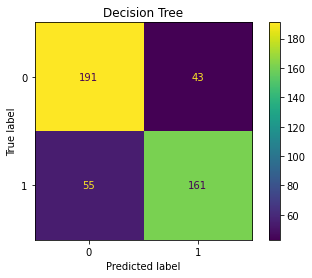

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)  
plt.title('Decision Tree')
plt.show()  


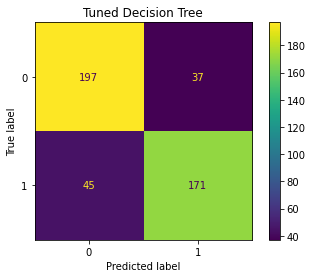

In [ ]:
plot_confusion_matrix(clf_t, x_test, y_test)
plt.title('Tuned Decision Tree')
plt.show()  

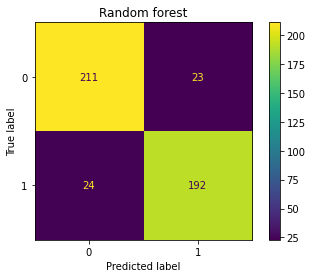

In [ ]:
plot_confusion_matrix(rf, x_test, y_test)  
plt.title('Random forest')
plt.show()  

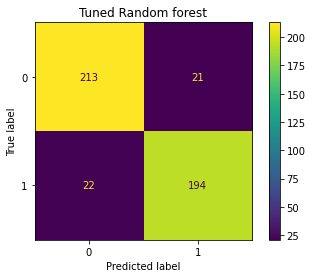

In [ ]:
plot_confusion_matrix(rf_t, x_test, y_test) 
plt.title('Tuned Random forest')
plt.show()  

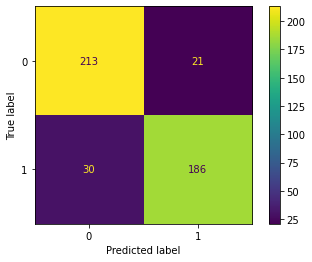

In [ ]:
plot_confusion_matrix(claf, x_test, y_test)
plt.title('Tuned Decision Tree')
plt.show()

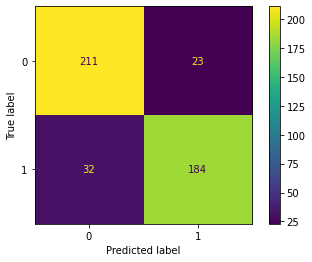

In [ ]:
plot_confusion_matrix(claf_t, x_test, y_test)  
plt.show()

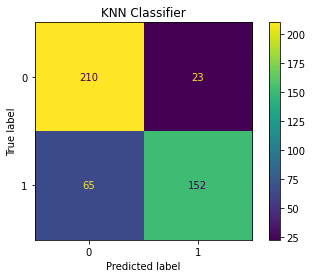

In [ ]:
plot_confusion_matrix(classifier, x1_test, y1_test)
plt.title('KNN Classifier')
plt.show()

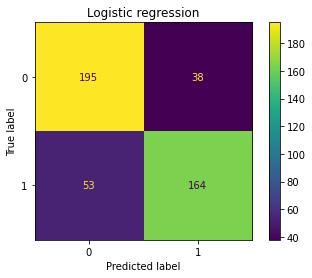

In [ ]:
plot_confusion_matrix(model, x1_test, y1_test) 
plt.title('Logistic regression')
plt.show()

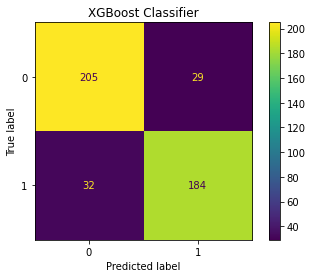

In [ ]:
plot_confusion_matrix(modelxgb, x_test, y_test) 
plt.title('XGBoost Classifier')
plt.show()

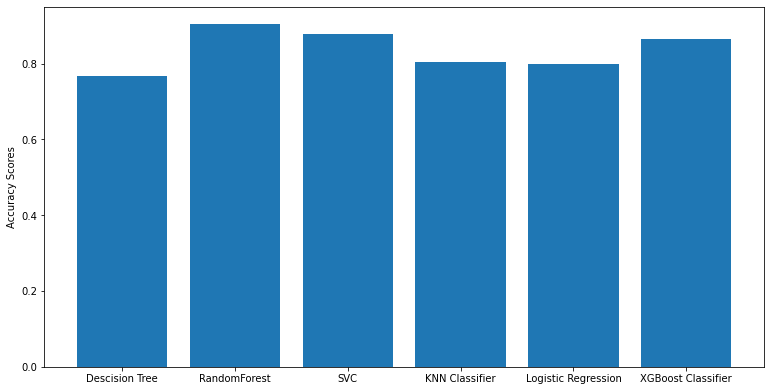

In [ ]:
#bar chart for all the model accuracy
fig, ax = plt.subplots(figsize=(10,5))
#fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Accuracy Scores')
ax.bar(Model_name,score)
plt.show()

# making predictions with the test data file

In [ ]:
p2_test_data=pd.read_csv('E:/ML Project/CE802_P2_Data/CE802_P2_Test.csv')

In [ ]:
p2_test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,19.10,0.05,-50.64,-9.21,17.09,20,-7.08,-34.01,-11.32,310.72,-5.48,900,5.45,10.38,NaN,NaN
1,14.60,1.32,-50.64,-2.64,17.04,20,4.74,-64.01,-9.72,170.72,-6.28,585,7.20,13.14,NaN,NaN
2,12.00,0.29,-80.64,-3.90,15.64,20,-7.62,-39.01,-7.52,60.72,-4.79,45,5.05,13.38,7.33,NaN
3,2.00,-5.10,-47.64,-25.92,8.10,2,4.42,-82.01,-17.14,14.72,-0.33,174,0.95,37.08,6.93,NaN
4,1.26,-3.43,-35.64,-18.60,8.87,2,1.88,-60.01,-14.36,14.72,-1.12,117,0.67,38.58,8.18,NaN


In [ ]:
p2_test_data_orig=p2_test_data.copy()

In [ ]:
p2_test_data_orig.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,19.10,0.05,-50.64,-9.21,17.09,20,-7.08,-34.01,-11.32,310.72,-5.48,900,5.45,10.38,NaN,NaN
1,14.60,1.32,-50.64,-2.64,17.04,20,4.74,-64.01,-9.72,170.72,-6.28,585,7.20,13.14,NaN,NaN
2,12.00,0.29,-80.64,-3.90,15.64,20,-7.62,-39.01,-7.52,60.72,-4.79,45,5.05,13.38,7.33,NaN
3,2.00,-5.10,-47.64,-25.92,8.10,2,4.42,-82.01,-17.14,14.72,-0.33,174,0.95,37.08,6.93,NaN
4,1.26,-3.43,-35.64,-18.60,8.87,2,1.88,-60.01,-14.36,14.72,-1.12,117,0.67,38.58,8.18,NaN


In [ ]:
p2_test_data.isnull().sum()

F1          0
F2          0
F3          0
F4          0
F5          0
F6          0
F7          0
F8          0
F9          0
F10         0
F11         0
F12         0
F13         0
F14         0
F15       750
Class    1500
dtype: int64

In [ ]:
# fill missing values with mean column values
p2_test_data.fillna(p2_test_data.mean(), inplace=True)

In [ ]:
p2_test_data.isnull().sum()

F1          0
F2          0
F3          0
F4          0
F5          0
F6          0
F7          0
F8          0
F9          0
F10         0
F11         0
F12         0
F13         0
F14         0
F15         0
Class    1500
dtype: int64

In [ ]:
p2_test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,19.10,0.05,-50.64,-9.21,17.09,20,-7.08,-34.01,-11.32,310.72,-5.48,900,5.45,10.38,7.716347,NaN
1,14.60,1.32,-50.64,-2.64,17.04,20,4.74,-64.01,-9.72,170.72,-6.28,585,7.20,13.14,7.716347,NaN
2,12.00,0.29,-80.64,-3.90,15.64,20,-7.62,-39.01,-7.52,60.72,-4.79,45,5.05,13.38,7.330000,NaN
3,2.00,-5.10,-47.64,-25.92,8.10,2,4.42,-82.01,-17.14,14.72,-0.33,174,0.95,37.08,6.930000,NaN
4,1.26,-3.43,-35.64,-18.60,8.87,2,1.88,-60.01,-14.36,14.72,-1.12,117,0.67,38.58,8.180000,NaN


In [ ]:
#dropped columns as part of feature selection
X_test = p2_test_data.drop(["Class","F11","F14"],axis=1)
#Y_test = p2_test_data.Class # storing the target in Y but since we are doing prediction this line is not required

In [ ]:
X_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F12,F13,F15
0,19.10,0.05,-50.64,-9.21,17.09,20,-7.08,-34.01,-11.32,310.72,900,5.45,7.716347
1,14.60,1.32,-50.64,-2.64,17.04,20,4.74,-64.01,-9.72,170.72,585,7.20,7.716347
2,12.00,0.29,-80.64,-3.90,15.64,20,-7.62,-39.01,-7.52,60.72,45,5.05,7.330000
3,2.00,-5.10,-47.64,-25.92,8.10,2,4.42,-82.01,-17.14,14.72,174,0.95,6.930000
4,1.26,-3.43,-35.64,-18.60,8.87,2,1.88,-60.01,-14.36,14.72,117,0.67,8.180000


In [ ]:
#checking to make sure that the tuned model is used for prediction
rf_t 

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=553)

In [ ]:
#making the predictions
Y_pred=rf_t.predict(X_test)

In [ ]:
Y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
#storing the predictions made in the original test file
p2_test_data_orig.loc[:,'Class']=Y_pred

In [ ]:
p2_test_data_orig.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,19.10,0.05,-50.64,-9.21,17.09,20,-7.08,-34.01,-11.32,310.72,-5.48,900,5.45,10.38,NaN,0
1,14.60,1.32,-50.64,-2.64,17.04,20,4.74,-64.01,-9.72,170.72,-6.28,585,7.20,13.14,NaN,1
2,12.00,0.29,-80.64,-3.90,15.64,20,-7.62,-39.01,-7.52,60.72,-4.79,45,5.05,13.38,7.33,0
3,2.00,-5.10,-47.64,-25.92,8.10,2,4.42,-82.01,-17.14,14.72,-0.33,174,0.95,37.08,6.93,0
4,1.26,-3.43,-35.64,-18.60,8.87,2,1.88,-60.01,-14.36,14.72,-1.12,117,0.67,38.58,8.18,1


In [ ]:
#mappling true and false to 1 and 0
p2_test_data_orig["Class"] = p2_data["Class"].map({0: False, 1: True})

In [ ]:
p2_test_data_orig.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,19.10,0.05,-50.64,-9.21,17.09,20,-7.08,-34.01,-11.32,310.72,-5.48,900,5.45,10.38,NaN,False
1,14.60,1.32,-50.64,-2.64,17.04,20,4.74,-64.01,-9.72,170.72,-6.28,585,7.20,13.14,NaN,True
2,12.00,0.29,-80.64,-3.90,15.64,20,-7.62,-39.01,-7.52,60.72,-4.79,45,5.05,13.38,7.33,False
3,2.00,-5.10,-47.64,-25.92,8.10,2,4.42,-82.01,-17.14,14.72,-0.33,174,0.95,37.08,6.93,False
4,1.26,-3.43,-35.64,-18.60,8.87,2,1.88,-60.01,-14.36,14.72,-1.12,117,0.67,38.58,8.18,True


In [ ]:
#exporting the test file with predictions 
p2_test_data_orig.to_csv('E:/ML Project/CE802_P2_Test.csv',index=False)